In [24]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import KernelPCA

In [25]:
value = pd.read_csv("https://raw.githubusercontent.com/insaid2018/pca-file/master/train.csv")
# print(value.head())
print(value.shape)
print(value.columns)
# print(value.describe())

          ID      target  48df886f9  0deb4b6a8  34b15f335  a8cb14b00  \
0  000d6aaf2  38000000.0        0.0          0        0.0          0   
1  000fbd867    600000.0        0.0          0        0.0          0   
2  0027d6b71  10000000.0        0.0          0        0.0          0   
3  0028cbf45   2000000.0        0.0          0        0.0          0   
4  002a68644  14400000.0        0.0          0        0.0          0   

   2f0771a37  30347e683  d08d1fbe3  6ee66e115  20aa07010  dc5a8f1d8  \
0          0          0          0          0        0.0        0.0   
1          0          0          0          0  2200000.0        0.0   
2          0          0          0          0        0.0        0.0   
3          0          0          0          0        0.0        0.0   
4          0          0          0          0  2000000.0        0.0   

   11d86fa6a  77c9823f2  8d6c2a0b2  4681de4fd  adf119b9a  cff75dd09  \
0        0.0          0          0          0          0        0.0  

             target     48df886f9     0deb4b6a8     34b15f335     a8cb14b00  \
count  4.459000e+03  4.459000e+03  4.459000e+03  4.459000e+03  4.459000e+03   
mean   5.944923e+06  1.465493e+04  1.390895e+03  2.672245e+04  4.530164e+03   
std    8.234312e+06  3.893298e+05  6.428302e+04  5.699652e+05  2.359124e+05   
min    3.000000e+04  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    6.000000e+05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    2.260000e+06  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    8.000000e+06  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
max    4.000000e+07  2.000000e+07  4.000000e+06  2.000000e+07  1.480000e+07   

          2f0771a37     30347e683     d08d1fbe3     6ee66e115     20aa07010  \
count  4.459000e+03  4.459000e+03  4.459000e+03  4.459000e+03  4.459000e+03   
mean   2.640996e+04  3.070811e+04  1.686522e+04  4.669208e+03  2.569407e+06   
std    1.514730e+06  5.770590e+05  7.512756e+05  1.

In [26]:
value = value.drop('ID', axis = 1)
drop_cols=[]
for cols in value.columns:
    if value[cols].std()==0:
        drop_cols.append(cols)
print("Number of constant columns to be dropped: ", len(drop_cols))
print(drop_cols)
value.drop(drop_cols,axis=1, inplace = True)

Number of constant columns to be dropped:  256
['d5308d8bc', 'c330f1a67', 'eeac16933', '7df8788e8', '5b91580ee', '6f29fbbc7', '46dafc868', 'ae41a98b6', 'f416800e9', '6d07828ca', '7ac332a1d', '70ee7950a', '833b35a7c', '2f9969eab', '8b1372217', '68322788b', '2288ac1a6', 'dc7f76962', '467044c26', '39ebfbfd9', '9a5ff8c23', 'f6fac27c8', '664e2800e', 'ae28689a2', 'd87dcac58', '4065efbb6', 'f944d9d43', 'c2c4491d5', 'a4346e2e2', '1af366d4f', 'cfff5b7c8', 'da215e99e', '5acd26139', '9be9c6cef', '1210d0271', '21b0a54cb', 'da35e792b', '754c502dd', '0b346adbd', '0f196b049', 'b603ed95d', '2a50e001c', '1e81432e7', '10350ea43', '3c7c7e24c', '7585fce2a', '64d036163', 'f25d9935c', 'd98484125', '95c85e227', '9a5273600', '746cdb817', '6377a6293', '7d944fb0c', '87eb21c50', '5ea313a8c', '0987a65a1', '2fb7c2443', 'f5dde409b', '1ae50d4c3', '2b21cd7d8', '0db8a9272', '804d8b55b', '76f135fa6', '7d7182143', 'f88e61ae6', '378ed28e0', 'ca4ba131e', '1352ddae5', '2b601ad67', '6e42ff7c7', '22196a84c', '0e410eb3d', '99

In [27]:
X = value.loc[:,value.columns != 'target']
# print(X.head())
y = np.log1p(value.loc[:,value.columns == 'target'])
# print(y.head())

In [28]:
# Scaling of the value?
sc = StandardScaler()
sc.fit(X)
x_value_sc = sc.transform(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(x_value_sc, y, test_size=0.20, random_state=1)
print (X_train)
# run this code 5 times and check the value of X_train 

[[-0.03764565 -0.02163947 -0.04688961 ... -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ... -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ... -0.07234203 -0.05636327
  -0.12585201]
 ...
 [-0.03764565 -0.02163947 -0.04688961 ... -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ... -0.07234203 -0.05636327
  -0.12585201]
 [-0.03764565 -0.02163947 -0.04688961 ... -0.07234203  0.02188543
   2.27014629]]


In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3567, 4735)
(3567, 1)
(892, 4735)
(892, 1)


In [31]:
# base model - no parameters 
rfc = RandomForestRegressor(random_state =0)
start_time = time.time()
rfc.fit(X_train,y_train)
end_time = time.time()
time1 = end_time-start_time
print(time1)
predictions = rfc.predict(X_test)
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, predictions))
print('RMSE for test set is {}'.format(RMSE_test))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

28.40634298324585
RMSE for test set is 1.4808062917707039


In [32]:
# how much loss of information is okay with you?
pca = PCA(0.95).fit(X) # you send your X 2) You define a number of Variance that you want to be explained of your original data?
# 5% loss in the information 
X.shape

(4459, 4735)

Text(0, 0.5, '% Variance Explained')

Text(0.5, 0, 'Number of Features')

Text(0.5, 1.0, 'PCA Analysis')

(30, 100.5)

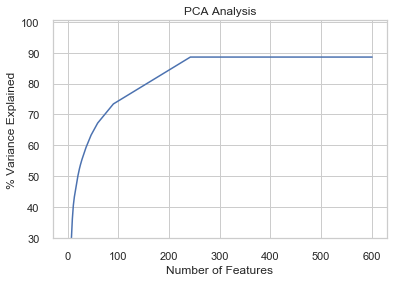

In [33]:
# use this code block as a standard template to decide n_component value or the valu of N which is the number you want to reduce to! 
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)

In [34]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

602 components explain 95% of the variation in data


In [37]:
reduction_n = [180, 220, 300]
classifier = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()] # base model 
result = {}
for eachValue in reduction_n:
    #k_pca = kernalPCA(n_components=eachValue, kernel='poly')
    pca = PCA(n_components=eachValue, random_state = 0)
    pca.fit(X)
    X_PCA = pca.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_PCA, y, test_size=0.25, random_state=1)
    result[eachValue] = {} 
    for eachClassifier in classifier: 
        model = eachClassifier
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()
        time2 = end_time-start_time
        # print(time2)

        predictions = model.predict(X_test)
        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, predictions))
        # print('RMSE for test set is {}'.format(RMSE_test))
        result[eachValue][eachClassifier.__class__.__name__] = [RMSE_test, time2]

PCA(copy=True, iterated_power='auto', n_components=180, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=220, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

PCA(copy=True, iterated_power='auto', n_components=300, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [38]:
pd.DataFrame(result)

,180,220,300
LinearRegression,"[2.622284201702253, 0.015115022659301758]","[3.1501488827565205, 0.019870996475219727]","[3.4517494985760293, 0.02794504165649414]"
DecisionTreeRegressor,"[2.1480041468602766, 0.4736311435699463]","[2.171363064192446, 0.6487250328063965]","[2.1899904191988324, 0.7723207473754883]"
RandomForestRegressor,"[1.581104138787022, 2.693474054336548]","[1.6040963402824142, 3.617374897003174]","[1.6034423977080372, 4.763062000274658]"
